In [1]:
# 前两行画图
%matplotlib inline
import matplotlib.pyplot as plt

# 数据处理
import numpy as np
import pandas as pd

# 系统库
import os, sys

# 自带数据
datalib_path = os.path.abspath('.')
sys.path.append(datalib_path)

In [2]:
train = pd.read_csv('comp1022_train.csv')
test = pd.read_csv('comp1022_test.csv')

In [3]:
train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,Revolving loans,F,N,Y,0,225000.0,585000.0,29250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
1,2,0,Cash loans,F,Y,Y,1,382500.0,888723.0,84514.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,0,Cash loans,F,Y,Y,1,67500.0,314100.0,16573.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,Cash loans,M,Y,Y,1,252000.0,379008.0,42889.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
4,5,0,Cash loans,F,N,Y,0,180000.0,547344.0,26460.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
5,6,0,Cash loans,M,N,Y,1,202500.0,314055.0,16164.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
6,7,0,Cash loans,F,Y,N,0,135000.0,148365.0,11610.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0,Cash loans,F,Y,Y,0,126000.0,270000.0,14778.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
8,9,1,Cash loans,F,N,Y,0,49500.0,135000.0,6565.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,10,0,Cash loans,F,N,N,0,157500.0,513531.0,22747.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [3]:
train.shape

(250000, 122)

In [11]:
test.shape

(50000, 121)

In [3]:
train.info(max_cols = 200)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    250000 non-null  int64  
 1    TARGET                        250000 non-null  int64  
 2    NAME_CONTRACT_TYPE            250000 non-null  object 
 3    CODE_GENDER                   250000 non-null  object 
 4    FLAG_OWN_CAR                  250000 non-null  object 
 5    FLAG_OWN_REALTY               250000 non-null  object 
 6    CNT_CHILDREN                  250000 non-null  int64  
 7    AMT_INCOME_TOTAL              250000 non-null  float64
 8    AMT_CREDIT                    250000 non-null  float64
 9    AMT_ANNUITY                   249989 non-null  float64
 10   AMT_GOODS_PRICE               249773 non-null  float64
 11   NAME_TYPE_SUITE               248941 non-null  object 
 12   NAME_INCOME_TYPE            

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from xgboost import plot_importance


In [4]:
cat_f = [x for x in train.columns if train[x].dtype == 'object']

for name in cat_f:
    enc = preprocessing.LabelEncoder()
    enc.fit(list(train[name].values.astype('str')) + list(test[name].values.astype('str')))
    test[name] = enc.transform(test[name].values.astype('str'))
    train[name] = enc.transform(train[name].values.astype('str'))


In [5]:
X_train = train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y_train = train['TARGET']

X_train.fillna(-1000, inplace=True) 
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)



In [6]:
X_test = test.drop(['SK_ID_CURR'], axis=1)
X_test.fillna(-1000, inplace=True) 
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 120 entries, NAME_CONTRACT_TYPE to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int32(16), int64(39)
memory usage: 42.7 MB


In [42]:
clf3 = XGBClassifier()
clf3.fit(x_train, y_train)
print("XGBoost Score = ", clf3.score(x_test, y_test))


c:\users\shaoy\it\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:32:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Score =  0.92062


In [25]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs=-1)
rf.fit(x_train, y_train)
print("Random Forest Score = ", rf.score(x_test, y_test))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Random Forest Score =  0.92054


In [61]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
pred=clf_stack.predict_proba(x_test)[:,1]
#pred=model.predict_proba(x_test)[:,1]*0.4+clf3.predict_proba(x_test)[:,1]*0.2+model2.predict(x_test)*0.4
fpr, tpr, thresholds = roc_curve(y_test, pred)

auc(fpr,tpr)

0.767510428909003

In [62]:
#y_pred=model.predict_proba(X_test)[:,1]*0.4+clf3.predict_proba(X_test)[:,1]*0.2+model2.predict(X_test)*0.4
y_pred=clf_stack.predict_proba(X_test)[:,1]
y_pred

array([0.23055359, 0.19651885, 0.01787514, ..., 0.03432067, 0.0473707 ,
       0.10573841])

In [63]:
import csv
predictions = zip(test["SK_ID_CURR"], y_pred)
with open("submission_stack2.csv","w",newline ='') as pred:
    csv_out = csv.writer(pred)
    csv_out.writerow(['SK_ID_CURR','TARGET'])
    for row in predictions:
        csv_out.writerow(row)

In [7]:
import lightgbm as lgbm
from sklearn.metrics import roc_auc_score

model = lgbm.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                            class_weight = 'balanced', learning_rate = 0.1,
                            n_jobs = -1, num_iterations=200, random_state = 50)

model.fit(x_train,y_train, eval_set = [(x_train,y_train),(x_test, y_test)], 
              eval_metric = 'auc')

c:\users\shaoy\it\miniconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's auc: 0.716303	training's binary_logloss: 0.679602	valid_1's auc: 0.706599	valid_1's binary_logloss: 0.679843
[2]	training's auc: 0.721696	training's binary_logloss: 0.668368	valid_1's auc: 0.710322	valid_1's binary_logloss: 0.668823
[3]	training's auc: 0.728249	training's binary_logloss: 0.658714	valid_1's auc: 0.717548	valid_1's binary_logloss: 0.659236
[4]	training's auc: 0.73196	training's binary_logloss: 0.650713	valid_1's auc: 0.720476	valid_1's binary_logloss: 0.651398
[5]	training's auc: 0.734508	training's binary_logloss: 0.643597	valid_1's auc: 0.723262	valid_1's binary_logloss: 0.644304
[6]	training's auc: 0.736215	training's binary_logloss: 0.637532	valid_1's auc: 0.724441	valid_1's binary_logloss: 0.638472
[7]	training's auc: 0.737989	training's binary_logloss: 0.6322	valid_1's auc: 0.726338	valid_1's binary_logloss: 0.633067
[8]	training's auc: 0.739275	training's binary_logloss: 0.627796	valid_1's auc: 0.727422	valid_1's binary_logloss: 0.628755
[9]	trainin

[69]	training's auc: 0.789511	training's binary_logloss: 0.558008	valid_1's auc: 0.753365	valid_1's binary_logloss: 0.568471
[70]	training's auc: 0.790113	training's binary_logloss: 0.557441	valid_1's auc: 0.753606	valid_1's binary_logloss: 0.568059
[71]	training's auc: 0.790541	training's binary_logloss: 0.556969	valid_1's auc: 0.753619	valid_1's binary_logloss: 0.567847
[72]	training's auc: 0.791074	training's binary_logloss: 0.556441	valid_1's auc: 0.753621	valid_1's binary_logloss: 0.567465
[73]	training's auc: 0.791546	training's binary_logloss: 0.555966	valid_1's auc: 0.753908	valid_1's binary_logloss: 0.567086
[74]	training's auc: 0.791914	training's binary_logloss: 0.555532	valid_1's auc: 0.753961	valid_1's binary_logloss: 0.566741
[75]	training's auc: 0.79244	training's binary_logloss: 0.555026	valid_1's auc: 0.754072	valid_1's binary_logloss: 0.566331
[76]	training's auc: 0.792896	training's binary_logloss: 0.554555	valid_1's auc: 0.753968	valid_1's binary_logloss: 0.566018
[

[142]	training's auc: 0.819225	training's binary_logloss: 0.528348	valid_1's auc: 0.753357	valid_1's binary_logloss: 0.550417
[143]	training's auc: 0.819493	training's binary_logloss: 0.528093	valid_1's auc: 0.753406	valid_1's binary_logloss: 0.550246
[144]	training's auc: 0.819893	training's binary_logloss: 0.527621	valid_1's auc: 0.753401	valid_1's binary_logloss: 0.549943
[145]	training's auc: 0.820222	training's binary_logloss: 0.527281	valid_1's auc: 0.753362	valid_1's binary_logloss: 0.549755
[146]	training's auc: 0.820664	training's binary_logloss: 0.52688	valid_1's auc: 0.753446	valid_1's binary_logloss: 0.549494
[147]	training's auc: 0.821028	training's binary_logloss: 0.526446	valid_1's auc: 0.753643	valid_1's binary_logloss: 0.549185
[148]	training's auc: 0.821391	training's binary_logloss: 0.526092	valid_1's auc: 0.753602	valid_1's binary_logloss: 0.548992
[149]	training's auc: 0.821793	training's binary_logloss: 0.525686	valid_1's auc: 0.753634	valid_1's binary_logloss: 0.

LGBMClassifier(class_weight='balanced', n_estimators=10000, num_iterations=200,
               objective='binary', random_state=50)

In [19]:
y_pred=model.predict_proba(X_test)

In [8]:
imp = model.feature_importances_
imp = np.array(list(zip(X_train.columns, imp)))
imp=imp[imp[:, 1].astype('int').argsort()][::-1]

In [9]:
imp[:15,1]

array(['372', '345', '335', '319', '317', '291', '272', '226', '225',
       '222', '221', '185', '167', '106', '95'], dtype='<U28')

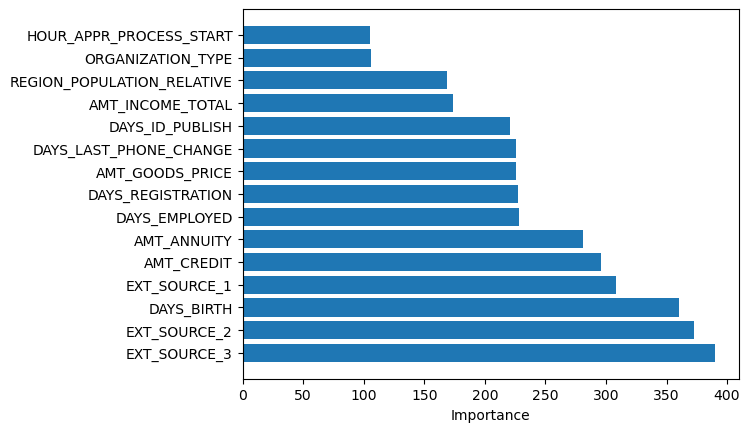

In [9]:
import matplotlib.pyplot as plt; plt.rcdefaults()
y_pos = np.arange(15)
plt.barh(y_pos,imp[:15,1].astype('int'))
plt.yticks(y_pos, imp[:15,0])
plt.xlabel('Importance')
plt.show()

In [10]:
for f in imp[imp[:,1].astype('int')<10][:,0]:
    X_train.drop(f,axis=1,inplace=True)
    X_test.drop(f,axis=1,inplace=True)

In [11]:
features2=imp[:10,0]
for i,f in enumerate(features2):
    for j in range(i,len(features2)):
        X_train[f+features2[j]]=X_train[f]*X_train[features2[j]]
        X_train[f+features2[j]+'/']=X_train[f]/(X_train[features2[j]]+0.1)
        X_test[f+features2[j]]=X_test[f]*X_test[features2[j]]
        X_test[f+features2[j]+'/']=X_test[f]/(X_test[features2[j]]+0.1)
    

In [80]:
for k in X_train.columns:
    if any(np.isinf(X_train[k])):
        print(k)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 193 entries, NAME_CONTRACT_TYPE to DAYS_LAST_PHONE_CHANGEDAYS_LAST_PHONE_CHANGE/
dtypes: float64(165), int32(12), int64(16)
memory usage: 356.7 MB


In [13]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 193 entries, NAME_CONTRACT_TYPE to DAYS_LAST_PHONE_CHANGEDAYS_LAST_PHONE_CHANGE/
dtypes: float64(165), int32(12), int64(16)
memory usage: 71.3 MB


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_train, train['TARGET'], test_size=0.2, random_state = 50)

In [27]:
import catboost
cat_columns=[]
tt=pd.read_csv('comp1022_train.csv')

for x in tt.columns:
    if tt[x].dtype == 'object':
        cat_columns.append(x)
cat_columns.remove('FLAG_OWN_REALTY')
cat_columns.remove('FONDKAPREMONT_MODE')
cat_columns.remove('HOUSETYPE_MODE')
cat_columns.remove('EMERGENCYSTATE_MODE')

model = catboost.CatBoostClassifier(cat_features = cat_columns, random_state = 1988)
model.fit(x_train, y_train, verbose=200)

Learning rate set to 0.098963
0:	learn: 0.5898229	total: 461ms	remaining: 7m 40s
200:	learn: 0.2382325	total: 48s	remaining: 3m 10s
400:	learn: 0.2299874	total: 1m 35s	remaining: 2m 21s
600:	learn: 0.2227594	total: 2m 21s	remaining: 1m 33s
800:	learn: 0.2165432	total: 3m 8s	remaining: 46.7s
999:	learn: 0.2110238	total: 3m 53s	remaining: 0us


In [31]:
import lightgbm as lgbm
from sklearn.metrics import roc_auc_score

model2 = lgbm.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                            is_unbalance=True, learning_rate = 0.1,
                            n_jobs = -1, num_iterations=117, random_state = 50)

model2.fit(x_train,y_train, eval_set = [(x_train,y_train),(x_test, y_test)], 
              eval_metric = 'auc')

c:\users\shaoy\it\miniconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's auc: 0.728022	training's binary_logloss: 0.27894	valid_1's auc: 0.719261	valid_1's binary_logloss: 0.275818
[2]	training's auc: 0.740401	training's binary_logloss: 0.292124	valid_1's auc: 0.728649	valid_1's binary_logloss: 0.290268
[3]	training's auc: 0.745741	training's binary_logloss: 0.308571	valid_1's auc: 0.734069	valid_1's binary_logloss: 0.30748
[4]	training's auc: 0.749215	training's binary_logloss: 0.326006	valid_1's auc: 0.736937	valid_1's binary_logloss: 0.325553
[5]	training's auc: 0.752518	training's binary_logloss: 0.343478	valid_1's auc: 0.739424	valid_1's binary_logloss: 0.34364
[6]	training's auc: 0.754306	training's binary_logloss: 0.360555	valid_1's auc: 0.740578	valid_1's binary_logloss: 0.361276
[7]	training's auc: 0.75569	training's binary_logloss: 0.377101	valid_1's auc: 0.741514	valid_1's binary_logloss: 0.378303
[8]	training's auc: 0.756942	training's binary_logloss: 0.392834	valid_1's auc: 0.742282	valid_1's binary_logloss: 0.394485
[9]	training

[67]	training's auc: 0.803216	training's binary_logloss: 0.548845	valid_1's auc: 0.764057	valid_1's binary_logloss: 0.561248
[68]	training's auc: 0.803723	training's binary_logloss: 0.548443	valid_1's auc: 0.764055	valid_1's binary_logloss: 0.560998
[69]	training's auc: 0.804255	training's binary_logloss: 0.547973	valid_1's auc: 0.764143	valid_1's binary_logloss: 0.560625
[70]	training's auc: 0.804702	training's binary_logloss: 0.547601	valid_1's auc: 0.764113	valid_1's binary_logloss: 0.560387
[71]	training's auc: 0.805247	training's binary_logloss: 0.547162	valid_1's auc: 0.764218	valid_1's binary_logloss: 0.560074
[72]	training's auc: 0.805772	training's binary_logloss: 0.546704	valid_1's auc: 0.764344	valid_1's binary_logloss: 0.559763
[73]	training's auc: 0.806327	training's binary_logloss: 0.546242	valid_1's auc: 0.764411	valid_1's binary_logloss: 0.559411
[74]	training's auc: 0.806753	training's binary_logloss: 0.545846	valid_1's auc: 0.764309	valid_1's binary_logloss: 0.559165


LGBMClassifier(is_unbalance=True, n_estimators=10000, num_iterations=117,
               objective='binary', random_state=50)

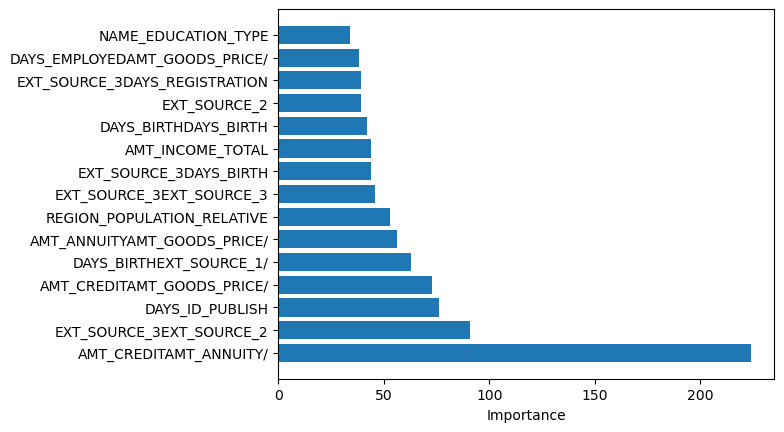

In [52]:
imp = model2.feature_importances_
imp = np.array(list(zip(X_train.columns, imp)))
imp=imp[imp[:, 1].astype('int').argsort()][::-1]

y_pos = np.arange(15)
plt.barh(y_pos,imp[:15,1].astype('int'))
plt.yticks(y_pos, imp[:15,0])
plt.xlabel('Importance')
plt.show()

In [ ]:
lgbcsv = pd.read_csv('submission_lgb.csv')
xgbcsv = pd.read_csv('submission_xgb.csv')
lgbcsv['TARGET']=xgbcsv['TARGET']*0.5+lgbcsv['TARGET']*0.5
lgbcsv.to_csv('substack.csv',index=False)

In [59]:
from sklearn.ensemble import StackingClassifier
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(estimators =[('cb',model),('lgb', model2), ('xgb',clf3)], final_estimator = lr, cv=3)

In [60]:
clf_stack.fit(x_train,y_train)

Learning rate set to 0.098963
0:	learn: 0.5898229	total: 180ms	remaining: 2m 59s
1:	learn: 0.5129223	total: 338ms	remaining: 2m 48s
2:	learn: 0.4568434	total: 476ms	remaining: 2m 38s
3:	learn: 0.4138887	total: 655ms	remaining: 2m 43s
4:	learn: 0.3786469	total: 827ms	remaining: 2m 44s
5:	learn: 0.3520479	total: 978ms	remaining: 2m 42s
6:	learn: 0.3320305	total: 1.13s	remaining: 2m 40s
7:	learn: 0.3165006	total: 1.31s	remaining: 2m 42s
8:	learn: 0.3036291	total: 1.49s	remaining: 2m 44s
9:	learn: 0.2935095	total: 1.64s	remaining: 2m 42s
10:	learn: 0.2866949	total: 1.8s	remaining: 2m 42s
11:	learn: 0.2805799	total: 1.97s	remaining: 2m 42s
12:	learn: 0.2756504	total: 2.14s	remaining: 2m 42s
13:	learn: 0.2710844	total: 2.27s	remaining: 2m 40s
14:	learn: 0.2676098	total: 2.43s	remaining: 2m 39s
15:	learn: 0.2650773	total: 2.57s	remaining: 2m 38s
16:	learn: 0.2628499	total: 2.74s	remaining: 2m 38s
17:	learn: 0.2608132	total: 2.89s	remaining: 2m 37s
18:	learn: 0.2594110	total: 3.02s	remaining: 

157:	learn: 0.2401700	total: 24.5s	remaining: 2m 10s
158:	learn: 0.2401342	total: 24.6s	remaining: 2m 10s
159:	learn: 0.2401215	total: 24.8s	remaining: 2m 9s
160:	learn: 0.2400803	total: 24.9s	remaining: 2m 9s
161:	learn: 0.2400235	total: 25s	remaining: 2m 9s
162:	learn: 0.2399679	total: 25.2s	remaining: 2m 9s
163:	learn: 0.2399108	total: 25.3s	remaining: 2m 9s
164:	learn: 0.2398508	total: 25.5s	remaining: 2m 9s
165:	learn: 0.2398165	total: 25.7s	remaining: 2m 8s
166:	learn: 0.2397721	total: 25.8s	remaining: 2m 8s
167:	learn: 0.2397300	total: 25.9s	remaining: 2m 8s
168:	learn: 0.2396789	total: 26.1s	remaining: 2m 8s
169:	learn: 0.2396440	total: 26.3s	remaining: 2m 8s
170:	learn: 0.2396058	total: 26.4s	remaining: 2m 7s
171:	learn: 0.2395818	total: 26.5s	remaining: 2m 7s
172:	learn: 0.2395478	total: 26.7s	remaining: 2m 7s
173:	learn: 0.2394874	total: 26.8s	remaining: 2m 7s
174:	learn: 0.2394464	total: 26.9s	remaining: 2m 7s
175:	learn: 0.2394015	total: 27.1s	remaining: 2m 6s
176:	learn: 

315:	learn: 0.2332721	total: 48s	remaining: 1m 43s
316:	learn: 0.2332456	total: 48.2s	remaining: 1m 43s
317:	learn: 0.2332089	total: 48.3s	remaining: 1m 43s
318:	learn: 0.2331869	total: 48.5s	remaining: 1m 43s
319:	learn: 0.2331194	total: 48.6s	remaining: 1m 43s
320:	learn: 0.2330652	total: 48.8s	remaining: 1m 43s
321:	learn: 0.2330040	total: 48.9s	remaining: 1m 42s
322:	learn: 0.2329652	total: 49.1s	remaining: 1m 42s
323:	learn: 0.2329327	total: 49.2s	remaining: 1m 42s
324:	learn: 0.2328999	total: 49.4s	remaining: 1m 42s
325:	learn: 0.2328652	total: 49.5s	remaining: 1m 42s
326:	learn: 0.2328252	total: 49.7s	remaining: 1m 42s
327:	learn: 0.2327779	total: 49.8s	remaining: 1m 42s
328:	learn: 0.2327715	total: 50s	remaining: 1m 41s
329:	learn: 0.2327316	total: 50.1s	remaining: 1m 41s
330:	learn: 0.2326923	total: 50.3s	remaining: 1m 41s
331:	learn: 0.2326465	total: 50.4s	remaining: 1m 41s
332:	learn: 0.2326036	total: 50.6s	remaining: 1m 41s
333:	learn: 0.2325399	total: 50.7s	remaining: 1m 4

472:	learn: 0.2273716	total: 1m 12s	remaining: 1m 20s
473:	learn: 0.2273245	total: 1m 12s	remaining: 1m 20s
474:	learn: 0.2272771	total: 1m 12s	remaining: 1m 20s
475:	learn: 0.2272387	total: 1m 12s	remaining: 1m 20s
476:	learn: 0.2271569	total: 1m 12s	remaining: 1m 19s
477:	learn: 0.2271223	total: 1m 13s	remaining: 1m 19s
478:	learn: 0.2270929	total: 1m 13s	remaining: 1m 19s
479:	learn: 0.2270568	total: 1m 13s	remaining: 1m 19s
480:	learn: 0.2270259	total: 1m 13s	remaining: 1m 19s
481:	learn: 0.2269947	total: 1m 13s	remaining: 1m 19s
482:	learn: 0.2269545	total: 1m 13s	remaining: 1m 19s
483:	learn: 0.2269074	total: 1m 13s	remaining: 1m 18s
484:	learn: 0.2268536	total: 1m 14s	remaining: 1m 18s
485:	learn: 0.2268054	total: 1m 14s	remaining: 1m 18s
486:	learn: 0.2267506	total: 1m 14s	remaining: 1m 18s
487:	learn: 0.2266869	total: 1m 14s	remaining: 1m 18s
488:	learn: 0.2266607	total: 1m 14s	remaining: 1m 18s
489:	learn: 0.2266129	total: 1m 14s	remaining: 1m 17s
490:	learn: 0.2265688	total:

626:	learn: 0.2219687	total: 1m 35s	remaining: 57s
627:	learn: 0.2219245	total: 1m 36s	remaining: 56.9s
628:	learn: 0.2218990	total: 1m 36s	remaining: 56.8s
629:	learn: 0.2218567	total: 1m 36s	remaining: 56.6s
630:	learn: 0.2218249	total: 1m 36s	remaining: 56.4s
631:	learn: 0.2217898	total: 1m 36s	remaining: 56.3s
632:	learn: 0.2217729	total: 1m 36s	remaining: 56.1s
633:	learn: 0.2217438	total: 1m 36s	remaining: 56s
634:	learn: 0.2216993	total: 1m 37s	remaining: 55.8s
635:	learn: 0.2216377	total: 1m 37s	remaining: 55.7s
636:	learn: 0.2216372	total: 1m 37s	remaining: 55.5s
637:	learn: 0.2216151	total: 1m 37s	remaining: 55.4s
638:	learn: 0.2215622	total: 1m 37s	remaining: 55.2s
639:	learn: 0.2215273	total: 1m 37s	remaining: 55.1s
640:	learn: 0.2214908	total: 1m 38s	remaining: 54.9s
641:	learn: 0.2214365	total: 1m 38s	remaining: 54.8s
642:	learn: 0.2214126	total: 1m 38s	remaining: 54.6s
643:	learn: 0.2213822	total: 1m 38s	remaining: 54.5s
644:	learn: 0.2213509	total: 1m 38s	remaining: 54.

782:	learn: 0.2171487	total: 2m	remaining: 33.3s
783:	learn: 0.2171119	total: 2m	remaining: 33.1s
784:	learn: 0.2170790	total: 2m	remaining: 33s
785:	learn: 0.2170394	total: 2m	remaining: 32.8s
786:	learn: 0.2169812	total: 2m	remaining: 32.7s
787:	learn: 0.2169206	total: 2m	remaining: 32.5s
788:	learn: 0.2168705	total: 2m 1s	remaining: 32.4s
789:	learn: 0.2168310	total: 2m 1s	remaining: 32.2s
790:	learn: 0.2168123	total: 2m 1s	remaining: 32.1s
791:	learn: 0.2167779	total: 2m 1s	remaining: 31.9s
792:	learn: 0.2167459	total: 2m 1s	remaining: 31.8s
793:	learn: 0.2167229	total: 2m 1s	remaining: 31.6s
794:	learn: 0.2166883	total: 2m 1s	remaining: 31.4s
795:	learn: 0.2166629	total: 2m 2s	remaining: 31.3s
796:	learn: 0.2166391	total: 2m 2s	remaining: 31.1s
797:	learn: 0.2166129	total: 2m 2s	remaining: 31s
798:	learn: 0.2165945	total: 2m 2s	remaining: 30.8s
799:	learn: 0.2165649	total: 2m 2s	remaining: 30.7s
800:	learn: 0.2165432	total: 2m 2s	remaining: 30.5s
801:	learn: 0.2165119	total: 2m 3s

939:	learn: 0.2125527	total: 2m 24s	remaining: 9.21s
940:	learn: 0.2125236	total: 2m 24s	remaining: 9.06s
941:	learn: 0.2124948	total: 2m 24s	remaining: 8.91s
942:	learn: 0.2124733	total: 2m 24s	remaining: 8.75s
943:	learn: 0.2124431	total: 2m 24s	remaining: 8.6s
944:	learn: 0.2124036	total: 2m 25s	remaining: 8.45s
945:	learn: 0.2123700	total: 2m 25s	remaining: 8.29s
946:	learn: 0.2123619	total: 2m 25s	remaining: 8.14s
947:	learn: 0.2123419	total: 2m 25s	remaining: 7.99s
948:	learn: 0.2123347	total: 2m 25s	remaining: 7.83s
949:	learn: 0.2123056	total: 2m 25s	remaining: 7.68s
950:	learn: 0.2122963	total: 2m 26s	remaining: 7.53s
951:	learn: 0.2122600	total: 2m 26s	remaining: 7.38s
952:	learn: 0.2122347	total: 2m 26s	remaining: 7.22s
953:	learn: 0.2121978	total: 2m 26s	remaining: 7.07s
954:	learn: 0.2121888	total: 2m 26s	remaining: 6.92s
955:	learn: 0.2121528	total: 2m 26s	remaining: 6.76s
956:	learn: 0.2121337	total: 2m 27s	remaining: 6.61s
957:	learn: 0.2121211	total: 2m 27s	remaining: 

c:\users\shaoy\it\miniconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
c:\users\shaoy\it\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.08323
0:	learn: 0.6055499	total: 116ms	remaining: 1m 56s
1:	learn: 0.5368951	total: 226ms	remaining: 1m 52s
2:	learn: 0.4836605	total: 323ms	remaining: 1m 47s
3:	learn: 0.4404937	total: 428ms	remaining: 1m 46s
4:	learn: 0.4063564	total: 550ms	remaining: 1m 49s
5:	learn: 0.3779957	total: 644ms	remaining: 1m 46s
6:	learn: 0.3560256	total: 757ms	remaining: 1m 47s
7:	learn: 0.3380452	total: 865ms	remaining: 1m 47s
8:	learn: 0.3245857	total: 992ms	remaining: 1m 49s
9:	learn: 0.3121400	total: 1.1s	remaining: 1m 49s
10:	learn: 0.3021947	total: 1.2s	remaining: 1m 47s
11:	learn: 0.2940128	total: 1.33s	remaining: 1m 49s
12:	learn: 0.2875078	total: 1.46s	remaining: 1m 50s
13:	learn: 0.2819347	total: 1.58s	remaining: 1m 51s
14:

152:	learn: 0.2404323	total: 18.4s	remaining: 1m 41s
153:	learn: 0.2403624	total: 18.5s	remaining: 1m 41s
154:	learn: 0.2403050	total: 18.6s	remaining: 1m 41s
155:	learn: 0.2402691	total: 18.7s	remaining: 1m 41s
156:	learn: 0.2402280	total: 18.8s	remaining: 1m 41s
157:	learn: 0.2401810	total: 18.9s	remaining: 1m 40s
158:	learn: 0.2401063	total: 19s	remaining: 1m 40s
159:	learn: 0.2400417	total: 19.1s	remaining: 1m 40s
160:	learn: 0.2399897	total: 19.3s	remaining: 1m 40s
161:	learn: 0.2399872	total: 19.4s	remaining: 1m 40s
162:	learn: 0.2399356	total: 19.5s	remaining: 1m 40s
163:	learn: 0.2399104	total: 19.7s	remaining: 1m 40s
164:	learn: 0.2398731	total: 19.8s	remaining: 1m 40s
165:	learn: 0.2398415	total: 19.9s	remaining: 1m 39s
166:	learn: 0.2397630	total: 20s	remaining: 1m 39s
167:	learn: 0.2396861	total: 20.1s	remaining: 1m 39s
168:	learn: 0.2396454	total: 20.2s	remaining: 1m 39s
169:	learn: 0.2396421	total: 20.3s	remaining: 1m 39s
170:	learn: 0.2396001	total: 20.4s	remaining: 1m 3

308:	learn: 0.2324628	total: 36.2s	remaining: 1m 20s
309:	learn: 0.2324000	total: 36.3s	remaining: 1m 20s
310:	learn: 0.2323450	total: 36.4s	remaining: 1m 20s
311:	learn: 0.2322808	total: 36.5s	remaining: 1m 20s
312:	learn: 0.2322223	total: 36.7s	remaining: 1m 20s
313:	learn: 0.2321684	total: 36.8s	remaining: 1m 20s
314:	learn: 0.2321463	total: 36.9s	remaining: 1m 20s
315:	learn: 0.2320926	total: 37s	remaining: 1m 20s
316:	learn: 0.2320422	total: 37.2s	remaining: 1m 20s
317:	learn: 0.2320329	total: 37.3s	remaining: 1m 20s
318:	learn: 0.2319958	total: 37.4s	remaining: 1m 19s
319:	learn: 0.2319550	total: 37.5s	remaining: 1m 19s
320:	learn: 0.2318866	total: 37.7s	remaining: 1m 19s
321:	learn: 0.2318273	total: 37.8s	remaining: 1m 19s
322:	learn: 0.2317780	total: 37.9s	remaining: 1m 19s
323:	learn: 0.2317574	total: 38s	remaining: 1m 19s
324:	learn: 0.2317331	total: 38.1s	remaining: 1m 19s
325:	learn: 0.2316743	total: 38.3s	remaining: 1m 19s
326:	learn: 0.2316338	total: 38.4s	remaining: 1m 1

466:	learn: 0.2249781	total: 55.1s	remaining: 1m 2s
467:	learn: 0.2249397	total: 55.2s	remaining: 1m 2s
468:	learn: 0.2249292	total: 55.3s	remaining: 1m 2s
469:	learn: 0.2249121	total: 55.4s	remaining: 1m 2s
470:	learn: 0.2248516	total: 55.5s	remaining: 1m 2s
471:	learn: 0.2247963	total: 55.7s	remaining: 1m 2s
472:	learn: 0.2247573	total: 55.8s	remaining: 1m 2s
473:	learn: 0.2247313	total: 55.9s	remaining: 1m 2s
474:	learn: 0.2246797	total: 56s	remaining: 1m 1s
475:	learn: 0.2246278	total: 56.1s	remaining: 1m 1s
476:	learn: 0.2246056	total: 56.2s	remaining: 1m 1s
477:	learn: 0.2245338	total: 56.4s	remaining: 1m 1s
478:	learn: 0.2245181	total: 56.5s	remaining: 1m 1s
479:	learn: 0.2244809	total: 56.6s	remaining: 1m 1s
480:	learn: 0.2244360	total: 56.7s	remaining: 1m 1s
481:	learn: 0.2243983	total: 56.8s	remaining: 1m 1s
482:	learn: 0.2243620	total: 56.9s	remaining: 1m
483:	learn: 0.2243289	total: 57s	remaining: 1m
484:	learn: 0.2242753	total: 57.2s	remaining: 1m
485:	learn: 0.2242048	tot

625:	learn: 0.2182947	total: 1m 14s	remaining: 44.5s
626:	learn: 0.2182743	total: 1m 14s	remaining: 44.4s
627:	learn: 0.2182511	total: 1m 14s	remaining: 44.3s
628:	learn: 0.2182257	total: 1m 14s	remaining: 44.2s
629:	learn: 0.2181984	total: 1m 15s	remaining: 44s
630:	learn: 0.2181632	total: 1m 15s	remaining: 43.9s
631:	learn: 0.2181405	total: 1m 15s	remaining: 43.8s
632:	learn: 0.2181048	total: 1m 15s	remaining: 43.7s
633:	learn: 0.2180489	total: 1m 15s	remaining: 43.6s
634:	learn: 0.2179950	total: 1m 15s	remaining: 43.4s
635:	learn: 0.2179533	total: 1m 15s	remaining: 43.3s
636:	learn: 0.2178896	total: 1m 15s	remaining: 43.2s
637:	learn: 0.2178757	total: 1m 15s	remaining: 43.1s
638:	learn: 0.2178359	total: 1m 15s	remaining: 42.9s
639:	learn: 0.2177943	total: 1m 16s	remaining: 42.8s
640:	learn: 0.2177702	total: 1m 16s	remaining: 42.7s
641:	learn: 0.2177470	total: 1m 16s	remaining: 42.6s
642:	learn: 0.2176915	total: 1m 16s	remaining: 42.5s
643:	learn: 0.2176433	total: 1m 16s	remaining: 4

781:	learn: 0.2126509	total: 1m 32s	remaining: 25.8s
782:	learn: 0.2126035	total: 1m 32s	remaining: 25.6s
783:	learn: 0.2125584	total: 1m 32s	remaining: 25.5s
784:	learn: 0.2125347	total: 1m 32s	remaining: 25.4s
785:	learn: 0.2124993	total: 1m 32s	remaining: 25.3s
786:	learn: 0.2124724	total: 1m 32s	remaining: 25.2s
787:	learn: 0.2124591	total: 1m 33s	remaining: 25s
788:	learn: 0.2124370	total: 1m 33s	remaining: 24.9s
789:	learn: 0.2123975	total: 1m 33s	remaining: 24.8s
790:	learn: 0.2123834	total: 1m 33s	remaining: 24.7s
791:	learn: 0.2123403	total: 1m 33s	remaining: 24.6s
792:	learn: 0.2123171	total: 1m 33s	remaining: 24.5s
793:	learn: 0.2123167	total: 1m 33s	remaining: 24.3s
794:	learn: 0.2123065	total: 1m 33s	remaining: 24.2s
795:	learn: 0.2122672	total: 1m 34s	remaining: 24.1s
796:	learn: 0.2122423	total: 1m 34s	remaining: 24s
797:	learn: 0.2122361	total: 1m 34s	remaining: 23.9s
798:	learn: 0.2121998	total: 1m 34s	remaining: 23.7s
799:	learn: 0.2121786	total: 1m 34s	remaining: 23.

937:	learn: 0.2073235	total: 1m 50s	remaining: 7.33s
938:	learn: 0.2072906	total: 1m 51s	remaining: 7.21s
939:	learn: 0.2072671	total: 1m 51s	remaining: 7.1s
940:	learn: 0.2072458	total: 1m 51s	remaining: 6.98s
941:	learn: 0.2072212	total: 1m 51s	remaining: 6.86s
942:	learn: 0.2071890	total: 1m 51s	remaining: 6.74s
943:	learn: 0.2071293	total: 1m 51s	remaining: 6.62s
944:	learn: 0.2070927	total: 1m 51s	remaining: 6.5s
945:	learn: 0.2070515	total: 1m 51s	remaining: 6.38s
946:	learn: 0.2069917	total: 1m 51s	remaining: 6.27s
947:	learn: 0.2069568	total: 1m 52s	remaining: 6.15s
948:	learn: 0.2069318	total: 1m 52s	remaining: 6.03s
949:	learn: 0.2069017	total: 1m 52s	remaining: 5.91s
950:	learn: 0.2068685	total: 1m 52s	remaining: 5.79s
951:	learn: 0.2068362	total: 1m 52s	remaining: 5.67s
952:	learn: 0.2067828	total: 1m 52s	remaining: 5.56s
953:	learn: 0.2067600	total: 1m 52s	remaining: 5.44s
954:	learn: 0.2067227	total: 1m 52s	remaining: 5.32s
955:	learn: 0.2066873	total: 1m 52s	remaining: 5

94:	learn: 0.2434304	total: 11s	remaining: 1m 45s
95:	learn: 0.2433753	total: 11.1s	remaining: 1m 44s
96:	learn: 0.2433135	total: 11.3s	remaining: 1m 44s
97:	learn: 0.2432474	total: 11.4s	remaining: 1m 44s
98:	learn: 0.2431779	total: 11.5s	remaining: 1m 44s
99:	learn: 0.2431291	total: 11.6s	remaining: 1m 44s
100:	learn: 0.2430852	total: 11.8s	remaining: 1m 44s
101:	learn: 0.2430457	total: 11.9s	remaining: 1m 44s
102:	learn: 0.2429963	total: 12s	remaining: 1m 44s
103:	learn: 0.2429388	total: 12.1s	remaining: 1m 44s
104:	learn: 0.2428708	total: 12.2s	remaining: 1m 44s
105:	learn: 0.2428209	total: 12.3s	remaining: 1m 43s
106:	learn: 0.2427658	total: 12.4s	remaining: 1m 43s
107:	learn: 0.2427098	total: 12.6s	remaining: 1m 44s
108:	learn: 0.2426269	total: 12.8s	remaining: 1m 44s
109:	learn: 0.2425681	total: 12.9s	remaining: 1m 44s
110:	learn: 0.2424954	total: 13s	remaining: 1m 44s
111:	learn: 0.2424316	total: 13.2s	remaining: 1m 44s
112:	learn: 0.2423739	total: 13.3s	remaining: 1m 44s
113:	

251:	learn: 0.2342683	total: 29.9s	remaining: 1m 28s
252:	learn: 0.2342260	total: 30s	remaining: 1m 28s
253:	learn: 0.2342135	total: 30.1s	remaining: 1m 28s
254:	learn: 0.2341680	total: 30.2s	remaining: 1m 28s
255:	learn: 0.2341550	total: 30.3s	remaining: 1m 28s
256:	learn: 0.2340725	total: 30.5s	remaining: 1m 28s
257:	learn: 0.2340320	total: 30.6s	remaining: 1m 27s
258:	learn: 0.2339595	total: 30.7s	remaining: 1m 27s
259:	learn: 0.2338965	total: 30.8s	remaining: 1m 27s
260:	learn: 0.2338299	total: 30.9s	remaining: 1m 27s
261:	learn: 0.2338089	total: 31s	remaining: 1m 27s
262:	learn: 0.2337382	total: 31.1s	remaining: 1m 27s
263:	learn: 0.2336942	total: 31.2s	remaining: 1m 27s
264:	learn: 0.2336820	total: 31.4s	remaining: 1m 26s
265:	learn: 0.2336228	total: 31.5s	remaining: 1m 26s
266:	learn: 0.2335998	total: 31.6s	remaining: 1m 26s
267:	learn: 0.2335593	total: 31.7s	remaining: 1m 26s
268:	learn: 0.2335496	total: 31.8s	remaining: 1m 26s
269:	learn: 0.2334856	total: 31.9s	remaining: 1m 2

407:	learn: 0.2272865	total: 47.6s	remaining: 1m 9s
408:	learn: 0.2272332	total: 47.7s	remaining: 1m 8s
409:	learn: 0.2271656	total: 47.8s	remaining: 1m 8s
410:	learn: 0.2271122	total: 48s	remaining: 1m 8s
411:	learn: 0.2270760	total: 48.1s	remaining: 1m 8s
412:	learn: 0.2270124	total: 48.2s	remaining: 1m 8s
413:	learn: 0.2269731	total: 48.3s	remaining: 1m 8s
414:	learn: 0.2269132	total: 48.4s	remaining: 1m 8s
415:	learn: 0.2268933	total: 48.5s	remaining: 1m 8s
416:	learn: 0.2268605	total: 48.7s	remaining: 1m 8s
417:	learn: 0.2268195	total: 48.8s	remaining: 1m 7s
418:	learn: 0.2267589	total: 48.9s	remaining: 1m 7s
419:	learn: 0.2267212	total: 49s	remaining: 1m 7s
420:	learn: 0.2266677	total: 49.1s	remaining: 1m 7s
421:	learn: 0.2266011	total: 49.2s	remaining: 1m 7s
422:	learn: 0.2265560	total: 49.3s	remaining: 1m 7s
423:	learn: 0.2265162	total: 49.5s	remaining: 1m 7s
424:	learn: 0.2264916	total: 49.6s	remaining: 1m 7s
425:	learn: 0.2264384	total: 49.7s	remaining: 1m 7s
426:	learn: 0.22

568:	learn: 0.2207541	total: 1m 6s	remaining: 50s
569:	learn: 0.2207371	total: 1m 6s	remaining: 49.9s
570:	learn: 0.2206914	total: 1m 6s	remaining: 49.8s
571:	learn: 0.2206497	total: 1m 6s	remaining: 49.7s
572:	learn: 0.2206214	total: 1m 6s	remaining: 49.5s
573:	learn: 0.2205880	total: 1m 6s	remaining: 49.4s
574:	learn: 0.2205730	total: 1m 6s	remaining: 49.3s
575:	learn: 0.2205316	total: 1m 6s	remaining: 49.2s
576:	learn: 0.2204835	total: 1m 6s	remaining: 49.1s
577:	learn: 0.2204546	total: 1m 7s	remaining: 48.9s
578:	learn: 0.2203957	total: 1m 7s	remaining: 48.8s
579:	learn: 0.2203600	total: 1m 7s	remaining: 48.7s
580:	learn: 0.2203085	total: 1m 7s	remaining: 48.6s
581:	learn: 0.2202753	total: 1m 7s	remaining: 48.5s
582:	learn: 0.2202176	total: 1m 7s	remaining: 48.4s
583:	learn: 0.2201953	total: 1m 7s	remaining: 48.2s
584:	learn: 0.2201740	total: 1m 7s	remaining: 48.1s
585:	learn: 0.2201131	total: 1m 7s	remaining: 48s
586:	learn: 0.2200826	total: 1m 8s	remaining: 47.9s
587:	learn: 0.22

724:	learn: 0.2150173	total: 1m 23s	remaining: 31.8s
725:	learn: 0.2149684	total: 1m 23s	remaining: 31.6s
726:	learn: 0.2149252	total: 1m 23s	remaining: 31.5s
727:	learn: 0.2148911	total: 1m 24s	remaining: 31.4s
728:	learn: 0.2148356	total: 1m 24s	remaining: 31.3s
729:	learn: 0.2148041	total: 1m 24s	remaining: 31.2s
730:	learn: 0.2147881	total: 1m 24s	remaining: 31.1s
731:	learn: 0.2147345	total: 1m 24s	remaining: 30.9s
732:	learn: 0.2146723	total: 1m 24s	remaining: 30.8s
733:	learn: 0.2146532	total: 1m 24s	remaining: 30.7s
734:	learn: 0.2146198	total: 1m 24s	remaining: 30.6s
735:	learn: 0.2145571	total: 1m 24s	remaining: 30.5s
736:	learn: 0.2145346	total: 1m 25s	remaining: 30.4s
737:	learn: 0.2145181	total: 1m 25s	remaining: 30.2s
738:	learn: 0.2144721	total: 1m 25s	remaining: 30.1s
739:	learn: 0.2144484	total: 1m 25s	remaining: 30s
740:	learn: 0.2144216	total: 1m 25s	remaining: 29.9s
741:	learn: 0.2143960	total: 1m 25s	remaining: 29.8s
742:	learn: 0.2143693	total: 1m 25s	remaining: 2

881:	learn: 0.2093880	total: 1m 41s	remaining: 13.6s
882:	learn: 0.2093572	total: 1m 41s	remaining: 13.5s
883:	learn: 0.2093475	total: 1m 41s	remaining: 13.3s
884:	learn: 0.2093334	total: 1m 41s	remaining: 13.2s
885:	learn: 0.2092901	total: 1m 41s	remaining: 13.1s
886:	learn: 0.2092769	total: 1m 41s	remaining: 13s
887:	learn: 0.2092652	total: 1m 42s	remaining: 12.9s
888:	learn: 0.2092128	total: 1m 42s	remaining: 12.8s
889:	learn: 0.2091973	total: 1m 42s	remaining: 12.6s
890:	learn: 0.2091772	total: 1m 42s	remaining: 12.5s
891:	learn: 0.2091617	total: 1m 42s	remaining: 12.4s
892:	learn: 0.2091406	total: 1m 42s	remaining: 12.3s
893:	learn: 0.2090893	total: 1m 42s	remaining: 12.2s
894:	learn: 0.2090641	total: 1m 42s	remaining: 12.1s
895:	learn: 0.2090310	total: 1m 42s	remaining: 12s
896:	learn: 0.2089659	total: 1m 43s	remaining: 11.8s
897:	learn: 0.2089155	total: 1m 43s	remaining: 11.7s
898:	learn: 0.2088499	total: 1m 43s	remaining: 11.6s
899:	learn: 0.2088282	total: 1m 43s	remaining: 11.

38:	learn: 0.2501880	total: 4.64s	remaining: 1m 54s
39:	learn: 0.2499603	total: 4.75s	remaining: 1m 53s
40:	learn: 0.2497471	total: 4.88s	remaining: 1m 54s
41:	learn: 0.2495542	total: 4.99s	remaining: 1m 53s
42:	learn: 0.2493269	total: 5.1s	remaining: 1m 53s
43:	learn: 0.2491412	total: 5.21s	remaining: 1m 53s
44:	learn: 0.2489448	total: 5.37s	remaining: 1m 53s
45:	learn: 0.2487081	total: 5.47s	remaining: 1m 53s
46:	learn: 0.2484862	total: 5.58s	remaining: 1m 53s
47:	learn: 0.2482979	total: 5.72s	remaining: 1m 53s
48:	learn: 0.2481970	total: 5.86s	remaining: 1m 53s
49:	learn: 0.2480745	total: 5.97s	remaining: 1m 53s
50:	learn: 0.2479360	total: 6.08s	remaining: 1m 53s
51:	learn: 0.2477893	total: 6.21s	remaining: 1m 53s
52:	learn: 0.2476754	total: 6.37s	remaining: 1m 53s
53:	learn: 0.2475723	total: 6.47s	remaining: 1m 53s
54:	learn: 0.2474136	total: 6.59s	remaining: 1m 53s
55:	learn: 0.2472732	total: 6.68s	remaining: 1m 52s
56:	learn: 0.2471484	total: 6.81s	remaining: 1m 52s
57:	learn: 0.

195:	learn: 0.2379046	total: 23.8s	remaining: 1m 37s
196:	learn: 0.2378309	total: 24s	remaining: 1m 37s
197:	learn: 0.2377817	total: 24.1s	remaining: 1m 37s
198:	learn: 0.2377029	total: 24.2s	remaining: 1m 37s
199:	learn: 0.2376170	total: 24.3s	remaining: 1m 37s
200:	learn: 0.2376142	total: 24.4s	remaining: 1m 37s
201:	learn: 0.2375831	total: 24.5s	remaining: 1m 36s
202:	learn: 0.2375204	total: 24.6s	remaining: 1m 36s
203:	learn: 0.2374702	total: 24.7s	remaining: 1m 36s
204:	learn: 0.2374154	total: 24.9s	remaining: 1m 36s
205:	learn: 0.2373622	total: 25s	remaining: 1m 36s
206:	learn: 0.2373543	total: 25.1s	remaining: 1m 36s
207:	learn: 0.2372907	total: 25.2s	remaining: 1m 35s
208:	learn: 0.2372890	total: 25.3s	remaining: 1m 35s
209:	learn: 0.2372175	total: 25.4s	remaining: 1m 35s
210:	learn: 0.2371567	total: 25.5s	remaining: 1m 35s
211:	learn: 0.2370874	total: 25.7s	remaining: 1m 35s
212:	learn: 0.2370394	total: 25.8s	remaining: 1m 35s
213:	learn: 0.2369685	total: 25.9s	remaining: 1m 3

351:	learn: 0.2302644	total: 41.7s	remaining: 1m 16s
352:	learn: 0.2302193	total: 41.8s	remaining: 1m 16s
353:	learn: 0.2301836	total: 41.9s	remaining: 1m 16s
354:	learn: 0.2301677	total: 42s	remaining: 1m 16s
355:	learn: 0.2301293	total: 42.1s	remaining: 1m 16s
356:	learn: 0.2300772	total: 42.2s	remaining: 1m 16s
357:	learn: 0.2300468	total: 42.3s	remaining: 1m 15s
358:	learn: 0.2299745	total: 42.4s	remaining: 1m 15s
359:	learn: 0.2299394	total: 42.6s	remaining: 1m 15s
360:	learn: 0.2298970	total: 42.7s	remaining: 1m 15s
361:	learn: 0.2298342	total: 42.8s	remaining: 1m 15s
362:	learn: 0.2298058	total: 42.9s	remaining: 1m 15s
363:	learn: 0.2297418	total: 43s	remaining: 1m 15s
364:	learn: 0.2296925	total: 43.2s	remaining: 1m 15s
365:	learn: 0.2296377	total: 43.3s	remaining: 1m 14s
366:	learn: 0.2295648	total: 43.4s	remaining: 1m 14s
367:	learn: 0.2295640	total: 43.5s	remaining: 1m 14s
368:	learn: 0.2295032	total: 43.6s	remaining: 1m 14s
369:	learn: 0.2294604	total: 43.7s	remaining: 1m 1

509:	learn: 0.2232342	total: 59.9s	remaining: 57.6s
510:	learn: 0.2232049	total: 1m	remaining: 57.4s
511:	learn: 0.2231611	total: 1m	remaining: 57.3s
512:	learn: 0.2231366	total: 1m	remaining: 57.2s
513:	learn: 0.2230832	total: 1m	remaining: 57.1s
514:	learn: 0.2230256	total: 1m	remaining: 57s
515:	learn: 0.2229578	total: 1m	remaining: 56.9s
516:	learn: 0.2229295	total: 1m	remaining: 56.8s
517:	learn: 0.2228721	total: 1m	remaining: 56.6s
518:	learn: 0.2228500	total: 1m	remaining: 56.5s
519:	learn: 0.2228111	total: 1m 1s	remaining: 56.4s
520:	learn: 0.2227800	total: 1m 1s	remaining: 56.3s
521:	learn: 0.2227665	total: 1m 1s	remaining: 56.1s
522:	learn: 0.2227315	total: 1m 1s	remaining: 56s
523:	learn: 0.2226920	total: 1m 1s	remaining: 55.9s
524:	learn: 0.2226529	total: 1m 1s	remaining: 55.8s
525:	learn: 0.2226071	total: 1m 1s	remaining: 55.6s
526:	learn: 0.2225763	total: 1m 1s	remaining: 55.5s
527:	learn: 0.2225591	total: 1m 1s	remaining: 55.4s
528:	learn: 0.2225078	total: 1m 2s	remainin

667:	learn: 0.2176225	total: 1m 18s	remaining: 39.1s
668:	learn: 0.2175608	total: 1m 18s	remaining: 39s
669:	learn: 0.2175419	total: 1m 18s	remaining: 38.9s
670:	learn: 0.2175233	total: 1m 19s	remaining: 38.8s
671:	learn: 0.2175047	total: 1m 19s	remaining: 38.6s
672:	learn: 0.2174881	total: 1m 19s	remaining: 38.6s
673:	learn: 0.2174526	total: 1m 19s	remaining: 38.4s
674:	learn: 0.2174080	total: 1m 19s	remaining: 38.3s
675:	learn: 0.2173772	total: 1m 19s	remaining: 38.2s
676:	learn: 0.2173369	total: 1m 19s	remaining: 38.1s
677:	learn: 0.2172686	total: 1m 20s	remaining: 38s
678:	learn: 0.2172247	total: 1m 20s	remaining: 37.9s
679:	learn: 0.2171798	total: 1m 20s	remaining: 37.8s
680:	learn: 0.2171533	total: 1m 20s	remaining: 37.7s
681:	learn: 0.2171044	total: 1m 20s	remaining: 37.5s
682:	learn: 0.2170521	total: 1m 20s	remaining: 37.4s
683:	learn: 0.2169936	total: 1m 20s	remaining: 37.3s
684:	learn: 0.2169439	total: 1m 20s	remaining: 37.2s
685:	learn: 0.2169107	total: 1m 20s	remaining: 37.

824:	learn: 0.2116890	total: 1m 37s	remaining: 20.7s
825:	learn: 0.2116473	total: 1m 37s	remaining: 20.6s
826:	learn: 0.2116077	total: 1m 37s	remaining: 20.5s
827:	learn: 0.2115520	total: 1m 38s	remaining: 20.4s
828:	learn: 0.2115038	total: 1m 38s	remaining: 20.3s
829:	learn: 0.2115028	total: 1m 38s	remaining: 20.1s
830:	learn: 0.2114795	total: 1m 38s	remaining: 20s
831:	learn: 0.2114614	total: 1m 38s	remaining: 19.9s
832:	learn: 0.2114331	total: 1m 38s	remaining: 19.8s
833:	learn: 0.2113915	total: 1m 38s	remaining: 19.7s
834:	learn: 0.2113568	total: 1m 38s	remaining: 19.5s
835:	learn: 0.2113227	total: 1m 38s	remaining: 19.4s
836:	learn: 0.2112934	total: 1m 39s	remaining: 19.3s
837:	learn: 0.2112423	total: 1m 39s	remaining: 19.2s
838:	learn: 0.2112133	total: 1m 39s	remaining: 19.1s
839:	learn: 0.2111976	total: 1m 39s	remaining: 19s
840:	learn: 0.2111615	total: 1m 39s	remaining: 18.9s
841:	learn: 0.2111522	total: 1m 39s	remaining: 18.7s
842:	learn: 0.2111212	total: 1m 40s	remaining: 18.

980:	learn: 0.2064465	total: 1m 56s	remaining: 2.26s
981:	learn: 0.2064101	total: 1m 56s	remaining: 2.14s
982:	learn: 0.2063924	total: 1m 56s	remaining: 2.02s
983:	learn: 0.2063672	total: 1m 56s	remaining: 1.9s
984:	learn: 0.2063294	total: 1m 57s	remaining: 1.78s
985:	learn: 0.2063013	total: 1m 57s	remaining: 1.66s
986:	learn: 0.2062569	total: 1m 57s	remaining: 1.54s
987:	learn: 0.2062150	total: 1m 57s	remaining: 1.43s
988:	learn: 0.2061702	total: 1m 57s	remaining: 1.31s
989:	learn: 0.2061120	total: 1m 57s	remaining: 1.19s
990:	learn: 0.2060912	total: 1m 57s	remaining: 1.07s
991:	learn: 0.2060526	total: 1m 57s	remaining: 950ms
992:	learn: 0.2060485	total: 1m 57s	remaining: 832ms
993:	learn: 0.2060318	total: 1m 58s	remaining: 713ms
994:	learn: 0.2060109	total: 1m 58s	remaining: 594ms
995:	learn: 0.2059534	total: 1m 58s	remaining: 475ms
996:	learn: 0.2059193	total: 1m 58s	remaining: 356ms
997:	learn: 0.2058917	total: 1m 58s	remaining: 238ms
998:	learn: 0.2058809	total: 1m 58s	remaining: 

c:\users\shaoy\it\miniconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
c:\users\shaoy\it\miniconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
c:\users\shaoy\it\miniconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
c:\users\shaoy\it\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifie

[10:38:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\shaoy\it\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\shaoy\it\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=3,
                   estimators=[('cb',
                                <catboost.core.CatBoostClassifier object at 0x000001A60580AFC8>),
                               ('lgb',
                                LGBMClassifier(is_unbalance=True,
                                               n_estimators=10000,
                                               num_iterations=117,
                                               objective='binary',
                                               random_state=50)),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1, im...
                                              interaction_constraints='',
   